# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.** 

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

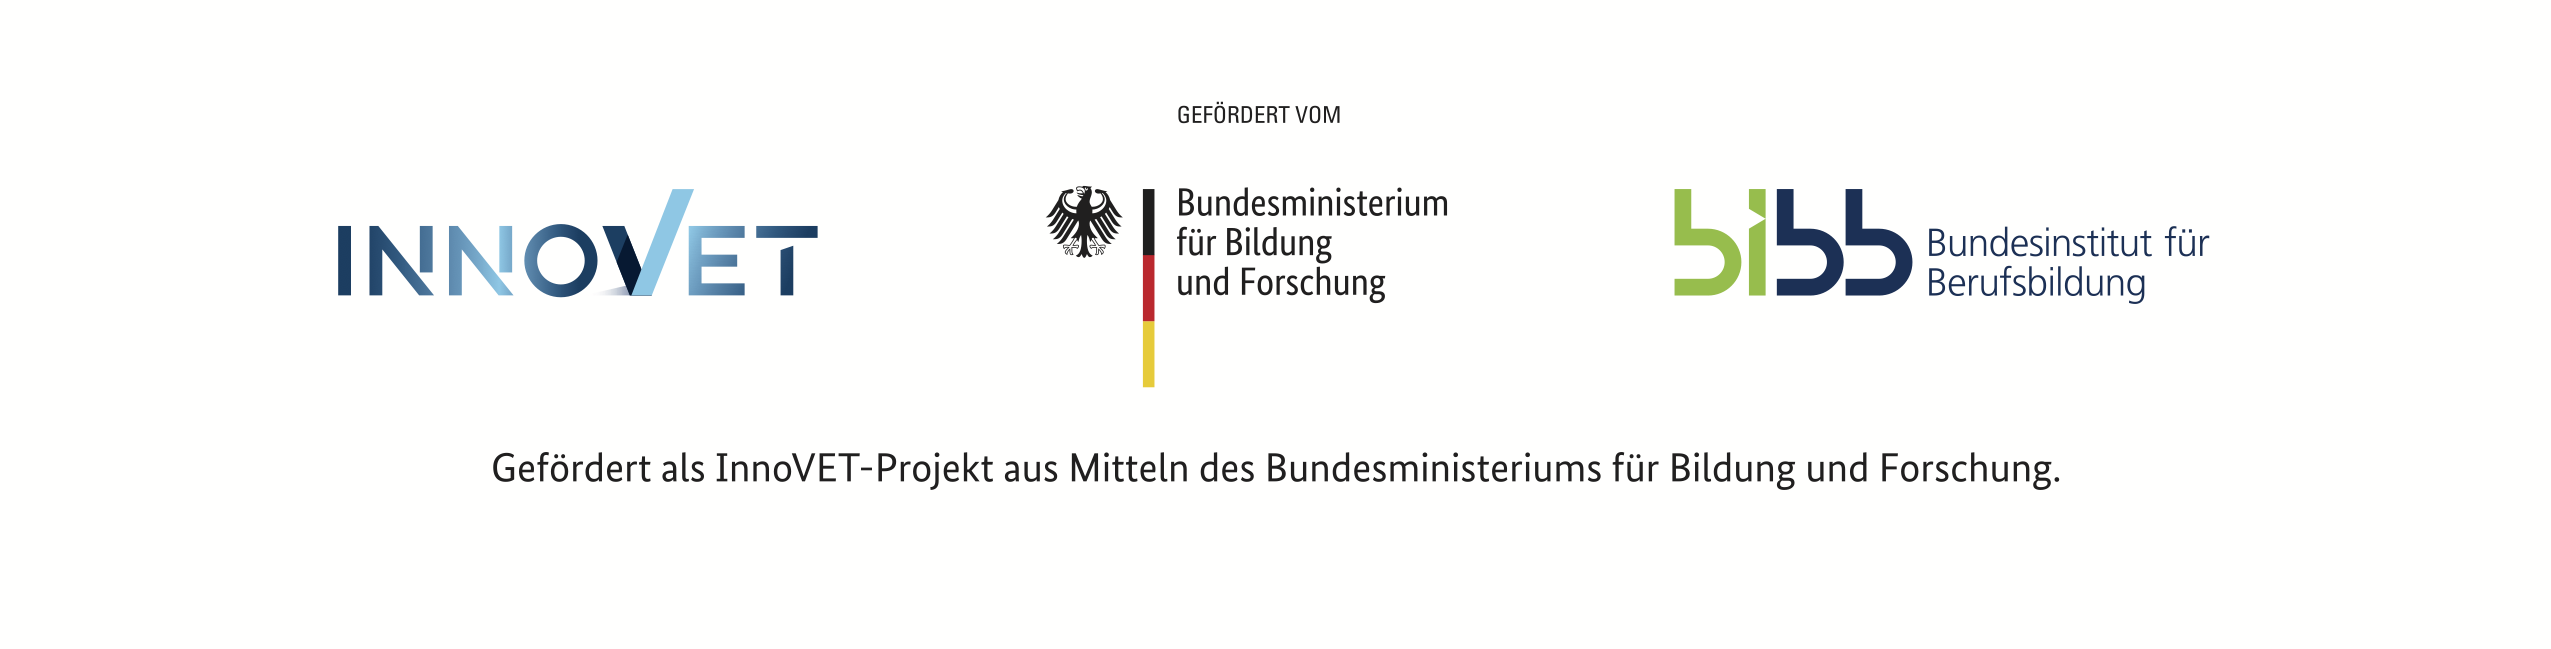

# Lizenzhinweis

Dieses Notebook "Kreuzvalidierung mit sklearn" wurde von Dirk Väth, Lindsey Vanderlyn und Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt. 

Das Werk, mit Ausnahme der oben abgebildenten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International).

# Kreuzvalidierung

Im letzten Notebook haben wir gesehen, dass es problematisch ist, wenn nur wenig Daten zum Trainieren und Testen vorhanden sind: einerseits möchte man möglichst viele Trainingsdaten verwenden, denn im Zweifel sind beim Training immer mehr Daten besser. Andererseits riskiert man, dass man eine nicht repräsentative Menge an Testdaten erwischt, wenn man nur wenige Datenpunkte zum Testen verwendet. D.h., eigentlich ist es auch beim Testen wichtig, ausreichend Daten zu verwenden. Wenn man bei wenigen Daten also in eine Trainings- und eine Testmenge aufteilt, hat man also das Problem, dass man beide Mengen möglichst groß haben möchte. 

In diesem Notebook werden wir eine Methode kennenlernen, mit der man man ein Modell in dieser Situation trotzdem mit der größtmöglichen Datenmenge trainieren und dabei immer noch repräsentativ evaluieren kann. 

Als Beispiel verwenden wir wieder Klassifikationsbäume. Wir werden sehen, wie wir dabei auch gleich die Parameter für das Modell optimieren können - dies nennt man Parameter-Tuning. 

## Bibliotheken laden

Wir benötigen zum Erstellen des Klassifikationsbaums wieder das Modul `tree` aus der Bibliothek `sklearn` und für das Laden des Iris-Datensatzes die Bibliothek `pandas`. Ebenso benötigen wir wieder die Bibliothek `matplotlib`, damit wir unser Modell und dessen Evaluierung visualisieren können.

In [ ]:
import pandas                 # Bibliothek für das Laden der Iris-Daten
from sklearn import tree      # Bibliothek für den Entscheidungsbaum
from matplotlib import pyplot # Bibliothek für die Visualisierung

## Daten laden, vorbereiten und filtern

Innerhalb dieses Abschnitts wiederholen wir die Schritte, wie wir schon im Kapitel *Klassifikationsbäume* kennengelernt haben, um einen Entscheidungsbaum für den Iris-Datensatz zu trainieren.

Wir können nun mit dem selben Code wie bei den Aufgaben im [Notebook zu den Parametern beim Training von Klassifikationsbäumen](https://antje-schweitzer.github.io/Jupyter_Notebooks_KI_und_Maschinelles_Lernen/D4-3b.Parameter.beim.Training.von.Klassifikationsbäumen.ipynb) die Bäume trainieren. 

In [ ]:
 # Daten laden
iris_url = 'https://datahub.io/machine-learning/iris/r/iris.csv'
iris = pandas.read_csv(iris_url)

# englische Begriffe übersetzen
iris.rename(columns = {'sepallength':'Kelchblattlänge','sepalwidth':'Kelchblattbreite', 'petallength':'Kronblattlänge', 'petalwidth':'Kronblattbreite', 'class':'Irisart'}, inplace=True)
# erste Zeilen anzeigen
print(iris.head())

In [ ]:
# Data Frames für die erklärenden Variablen sowie die erklärte Variable generieren (für alle Daten)
daten = pandas.DataFrame(iris[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge', 'Irisart']])

## K-fache Aufteilung des Datensatzes in Trainings- und Testdaten

Gibt es eine Möglichkeit, unseren Datensatz intelligenter zu nutzen, statt diesen direkt in einen festen Trainings- und Testteil aufzuteilen?
Vor allem, wenn wir wenig Daten haben, wollen wir so wenig Daten wie möglich für das Testen verlieren, aber trotzdem eine Idee haben, wie gut unser Modell verallgemeinert.

Hier hilft die Idee der k-fachen Kreuzvalidierung:
Anstatt unseren Datensatz in zwei Teile aufzuspalten, teilen wir ihn in $k$ gleich große Teile. Auf Englisch sagt man, man teilt den Datensatz in $k$ Folds (deutsch: Falten).

Statt unser Modell einmal zu trainieren und einmal zu evaluieren, trainieren und evaluieren wir unser Modell $k$-Mal!
Dabei nutzen wir immer einen der $k$ Teile als Evaluationsdaten und die $k-1$ restlichen Teile als Trainingsdaten.
**Dabei bleibt diese Aufteilung während aller Durchläufe konstant!**

Hier ein Bild zur Veranschaulichung mit $k=5$:



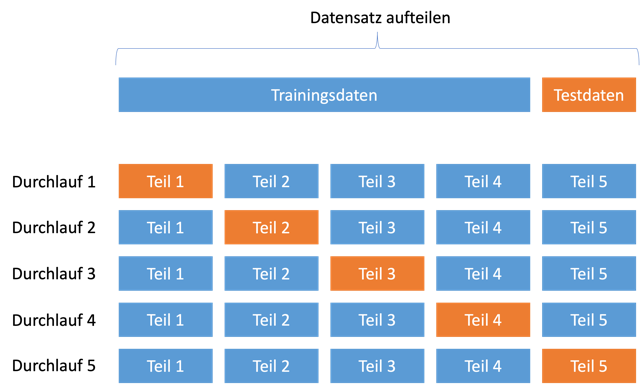


In jedem Durchlauf $i$


*   Trainieren wir auf $k-1$ Teilen des Datensatzes (hier also auf 4 Teilen), wobei wir Teil $i$ auslassen (hier: blau markiert)
*   Evaluieren wir auf Teilmenge $i$ des Datensatzes (hier: orange markiert) und merken uns das Ergebnis

Nach den $k$ Durchläufen nehmen wir den Durschnitt aller $k$ Evaluierungsergebnisse und geben diesen als Evaluierungsergebnis an.


---

**Bei der k-fachen Kreuzvalidierung teilt man die Daten in k Teile und testet/evaluiert damit die Modelle k mal. Die jeweils nicht zum Testen verwendeten Daten nutzt man jeweils als Trainingsdaten.**

---

**Anmerkung**: Beim Training von Neuronalen Netzen  nutzt man die k-fache Kreuzvalidierung auch oft zum sogenannten **Tunen**. Man hat nämlich bei Neuronalen Netzen die Auswahl zwischen verschiedenen Methoden, das Training durchzuführen, sowie evtl. auch die Auswahl zwischen unterschiedlichen Netzwerkarchitekturen. Um zu entscheiden, mit welcher Auswahl an Methoden und Architekturen (im Fachjargon: mit welchen *Metaparametern*) man am besten traininert, kann man per Kreuzvalidierung auf den Trainingsdaten viele verschiedenen Werte für diese Metaparameter durchprobieren und sich dann für die Metaparameter mit den besten Ergebnissen entscheiden. 

Anschließend evaluiert man das Modell dann noch ganz normal auf einem separaten Testdatensatz, den man bis dahin noch nicht angesehen hat, um eine realistische Einschätzung der Modellperformance des so gefundenen Netzwerks zu bekommen. 

---

**Metaparameter sind diejenigen Parameter von Machine Learning-Modellen, die nicht beim Training gelernt werden, sondern vorher festgelegt werden. Bei neuronalen Netzwerken gibt es besonders viele Metaparameter.**

---

---

**Das Suchen nach den besten Metaparametern für ein Modell nennt man Tuning.**

**Die k-fache Kreuzvalidierung kann gut für Metaparameter-Tuning eingesetzt werden.**

---

Im folgenden sehen wir den Code für die k-fache Kreuzvalidierung.

Dazu gibt es in scikit ein Objekt `sklearn.model_selection.KFold`,
das uns die Datenpunktindizes für jede Aufteilung liefert.
Es nimmt die folgenden Parameter:


*   `n_splits`: hier $k$: die Anzahl der Unterteilungen / Durchläufe
*   `shuffle`: sollen die Daten gemischt werden?
*   `random_state`: Reproduzierbarkeit (gleiche Zahl erzeugt bei jedem Ausführen die gleiche Aufteilung trotz Mischen)



---

**In `sklearn.model_selection` gibt es ein Objekt `KFold`, das Daten für die k-fache Kreuzvalidierung in k Teilmengen aufteilt.**

---

Nachdem wir dieses Objekt haben, können wir darauf die Funktion `split` aufrufen. Sie benötigt als Argument die Daten, die aufgeteilt werden sollen, hier also unseren Datensatz. Dafür gibt sie zwei Werte zurück: der erste ist eine Sammlung aller Trainingsindizes, der zweite enthält die Evaluierungsindizes.

Wenn man sich die Daten als Tabelle vorstellt, bei der in jeder Zeile ein Datenpunkt steht, sind die Trainingsindizes also sozusagen die Zeilennummern aller Zeilen, die fürs Training verwendet werden sollen, und die Evaluierungsindizes die Nummern der Zeilen, mit denen evaluiert werden soll. 


In [ ]:
# Importiere die Aufteilungsfunktionalität
from sklearn.model_selection import KFold

In [ ]:
# ein k auswählen: gibt vor, dass:
# - wir den Datensatz in k Teile aufteilen
# - wir k verschiedene Modelle (mit den selben Parametern) trainieren und evaluieren
k = 5

aufteilung = KFold(n_splits=k, shuffle=True, random_state=42) # Erzeuge das KFold-Objekt, das die Daten aufteilt und mischt
indizes = list(aufteilung.split(daten))   # Teile "daten" auf und mische sie 

print("Aufteilungen", len(indizes)) # Ausgeben, in wie viele Teile "daten" aufgeteilt wurde

Jetzt haben wir die Liste `indizes`, die in jedem Eintrag $i$ genau 2 Indexlisten enthält:
0. Indizes der Trainings-Datenpunkte in `daten` für Durchlauf $i$   
1. Indizes der Evaluations-Datenpunkte in `daten` für Durchlauf $i$   

Geben wir die Indizes für den ersten Durchlauf ($i=0$) aus:

In [ ]:
i = 0 # 
durchlauf_i = indizes[i]
training_indizes_i, evaluierung_indizes_i = durchlauf_i

print("Trainings-Indizes für Durchlauf", i, ":", training_indizes_i)
print("Evaluierungs-Indizes für Durchlauf", i, ":", evaluierung_indizes_i)

Hier sehen wir für Durchlauf 0, welche Indizes aus den originalen Daten zu den  Trainings- und Evaluationsdaten des aktuellen Durchlaufs gehören.
Wir können uns nun z.B. mithilfe von `iloc[]` anzeigen lassen, um welche Daten es sich dabei handelt:

In [ ]:
daten.iloc[training_indizes_i]

Das sind also die 120 Datenpunkte für den ersten Durchlauf.
Diese sind enstanden durch 
*   Mischen von `daten`
*   Aufteilen von `daten` in 5 Teile
*   Ziehen der Trainings-Datenpunkte aus der ersten Unterteilung (120 Stück)

Die zugehörigen Testdaten für die erste Unterteilung sind dann alle Indizes, die nicht in den Trainingsdaten auftauchen:

In [ ]:
daten.iloc[evaluierung_indizes_i]

Nun können wir über alle 5 Aufteilungen *iterieren* (d.h., alle einmal durchmachen), und dabei jeweils ein Modell auf den Trainingsdaten der $i$-ten Iteration trainieren und anschließend auf den Testdaten der $i$-ten Iteration auswerten.

Da wir in jedem Durchlauf im Prinzip dasselbe machen, bietet es sich an, den Code als Schleife zu implementieren: in jedem Durchlauf ändern sich dabei nur die Indizes für Training und Evaluierung. Ansonsten passiert immer dasselbe. 

Wir verwenden hier den F1-Score als Maß für die Evaluierung; hier könnte man auch jedes andere Evaluationsmaß verwenden.

In [ ]:
from sklearn.metrics import f1_score # Importiere die Funktion, die den F1 Score berechnet

# eine leere Liste erzeugen, in der wir anschließend pro Iteration ein Evaluierungsergebnis einfügen
f1_durchlaeufe = []

# Schleife: in jedem Durchlauf nehmen wir das nächste Paar Indizes 
for training_indizes, evaluierung_indizes in indizes:
  # Daten für aktuellen Durchlauf nehmen
  daten_training = daten.iloc[training_indizes] # Nimm die Trainingspunkte der aktuellen Iteration aus dem Datensatz
  X_training = daten_training[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
  y_training = daten_training['Irisart'] # Data Frames für die erklärte Variable generieren

  daten_evaluierung = daten.iloc[evaluierung_indizes] # Nimm die Evaluierungspunkte der aktuellen Iteration aus dem Datensatz
  X_evaluierung = daten_evaluierung[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
  y_evaluierung = daten_evaluierung['Irisart'] # Data Frames für die erklärte Variable generieren

  # Baum trainieren
  baum = tree.DecisionTreeClassifier(max_depth=3, random_state=42)  # Baum initialisieren (vorbereiten)
  baum.fit(X_training, y_training)  # Baum trainieren

  # Vorhesagen auf Testdaten
  y_hut = baum.predict(X_evaluierung)
  
  # Baum evaluieren (hier mit Macro-F1-Score)
  f1 = f1_score(y_evaluierung, y_hut, average="macro")
  # das Ergebnis an die Liste der Evaluierungsergebnisse anhängen
  f1_durchlaeufe.append(f1) # merke F1-Score des aktuellen Durchlaufs

# F1-Scores für alle Durchläufe
print(f1_durchlaeufe)

Jetzt haben wir in `f1_durchlaeufe` eine Liste mit den Macro-F1 Scores der fünf Durchläufe. Wir sehen nun auch, dass es gut war, die Evaluierung auf 5 verschiedenen Testdatenmengen zu machen, denn die Ergebnisse sind durchaus unterschiedlich - von ca. 91 bis 100%!

Stellen Sie sich vor, wir hätten keine Kreuzvalidierung gemacht, sondern die Daten nur einmal aufgeteilt und dabei zufällig die Aufteilung gewählt, die die 100% F1-Score liefert - wir hätten geglaubt, wir haben das perfekte Modell gefunden - dabei handelt es sich bei diesem Score nur um Glück mit der Aufteilung. 


---

**Beim Evaluieren von Modellen auf unterschiedlichen Teilmengen von Testdaten können die Ergebnisse zufallsbedingt schwanken.**

---


Um also ein realistisches Maß für die Performance unseres Modells zu schätzen, geben wir den Durchschnitt aller Durchläufe aus. Dafür verwenden wir die Funktion `sum()`, die alle Werte in `f1_durchlaeufe` addiert, und teilen durch die Anzahl der Durchläufe. Diese ist 5, wie wir wissen, wir gehen hier aber auf Nummer sicher und "zählen" mithilfe der Funktion `len()`, wie viele Evaluierungsergebnisse in unsere Liste gespeichert sind. Durch diese teilen wir dann. 

Wir bekommen dadurch eine realistischere Schätzung dafür, wie gut unser Modell wirklich ist, als wenn wir nur einmal auf einem kleinen Satz zufällig ausgewählter Testdaten evaluieren.

In [ ]:
f1_schaetzung = sum(f1_durchlaeufe)/len(f1_durchlaeufe) # Durchschnitt aller Durchläufe berechnen
print(f1_schaetzung) # Gib den Durchschnitt aller F1-Scores als Schätzung der Performance aus

---

**Das Ziel der k-fachen Kreuzvalidierung ist, durch Mitteln über Evaluationsergebnisse auf verschiedenen Teilmengen diese Schwankungen zu vermeiden.**

---

## K-fache Kreuzvalidierung mit sklearn

Jetzt haben wir gesehen, wie die k-fache Crossvalidierung konkret funktioniert. 

Statt die Schleife von oben selbst zu schreiben, können wir uns den Aufwand aber auch mal wieder von `sklearn` abnehmen lassen, indem wir die Funktion `cross_val_score` importieren.
Sie benötigt als Parameter 
*   `estimator`: Unser initialisiertes, aber noch nicht trainiertes Modell (hier: `tree.DecisionClassifier`)
*   `X`: Die Data Frames für die erklärende Variable
*   `y`: Die Data Frames für die erklärte Variable
*   `cv`: Die Anzahl Aufteilungen (unser $k$-Wert)
*   `scoring`: Die Evaluierungsfunktion (Name)

Dabei gibt uns diese Funktion direkt das ausgewertete Evaluationsmaß (das wir mit `scoring` angegeben haben) für jeden Durchlauf zurück.

---

**In `sklearn.model_selection` gibt es die Funktion `cross_val_score`, die die komplette k-fache Kreuzvalidierung durchführen kann. Sie benötigt dafür nur das Modell, die Daten, die korrekten Vorhersagen, die Anzahl der Falten (also k) und das Evaluationsmaß, mit dem evaluiert werden soll.**

---

In [ ]:
from sklearn.model_selection import cross_val_score # Importiere die Funktion

X = daten[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']] # Data Frames für die erklärenden Variablen generieren
y = daten['Irisart'] # Data Frames für die erklärte Variable generieren

baum = tree.DecisionTreeClassifier(max_depth=3, random_state=42) # Baum vorbereiten

f1_durchlaeufe = cross_val_score(baum, X, y, cv=5, scoring="f1_macro") # Berechne 5-fache Kreuzvalidierung mit F1-macro Score als Evaluierungsmaß
print("F1 Scores", f1_durchlaeufe) # Gib die F1-Scores aller Durchläufe aus

f1_schaetzung = sum(f1_durchlaeufe)/len(f1_durchlaeufe) # Durchschnitt aller Durchläufe berechnen
print('Durchschnitt:',f1_schaetzung) # Gib den Durschnitt aller F1-Scores als Schätzung der Performance aus

Auch hier bestätigt sich also, dass man eine gewisse Bandbreite an Werten bekommt - hier zwischen 91% und 100% - und dass insofern der Mittelwert von ca. 96% eine vernünftige Schätzung darstellt. Falls Sie sich wundern, warum wir nicht exakt die Zahlen von oben bekommen - das liegt daran, dass `cross_val_score` seine eigene zufällige Aufteilung in 5 Teile macht. 

Man kann aber als Argument statt `cv=5` auch eine existierende Aufteilung vorgeben. Probieren Sie es aus und geben Sie `cv=aufteilung.split(daten)` an - dadurch teilt `cross_val_score` genauso auf wie wir oben, und man erhält auch dieselben Werte. 

## Parameter-Tuning mit Kreuzvalidierung

Nachdem wir nun wissen, wie die Kreuzvalidierung funktioniert, können wir diese nutzen, um unsere Modell-Metaparameter zu optimieren. Im Gegensatz zu Neuronalen Netzwerken gibt es bei Klassifikationsbäumen nicht allzu viele Metaparameter, aber die Parameter zum Pruning, die Sie im [Notebook zu den Parametern beim Training von Klassifikationsbäumen](https://antje-schweitzer.github.io/Jupyter_Notebooks_KI_und_Maschinelles_Lernen/D4-3b.Parameter.beim.Training.von.Klassifikationsbäumen.ipynb) kennengelernt haben, sind solche Metaparameter. 

Wir suchen hier beispielhaft den besten Wert für die Baumtiefe als Pruning-Parameter. 
Dazu probieren wir alle Werte von 1 bis 5 für Baumtiefe aus. Für jeden dieser Werte führen wir eine k-fache Kreuzvalidierung durch und geben den durchschnittlichen F1-Score je Parameter aus. So kann man sehen, mit welcher Baumtiefe man das beste Modell bekommt. 

In [ ]:
# die Parameter 1, 2, 3, 4, 5 in einer Schleife durchprobieren:
for tiefe in range(1,6): # range(1,6) bedeutet Werte von 1 bis Werte < 6, also ohne die 6
  baum = tree.DecisionTreeClassifier(max_depth=tiefe, random_state=42) # Baum vorbereiten
  f1_durchlaeufe = cross_val_score(baum, X, y, cv=5, scoring="f1_macro") # Berechne 5-fache Kreuzvalidierung mit F1-macro Score als Evaluierungsmaß
  f1_schaetzung = sum(f1_durchlaeufe)/len(f1_durchlaeufe) # Durchschnitt aller Durchläufe berechnen
  print("F1-Score für Tiefe", tiefe, ":", f1_schaetzung) # Gib den Durschnitt aller F1-Scores als Schätzung der Performance aus


Hier sehen wir die geschätzte Modell-Performance für die Baumtiefen 1 bis 5.
Dabei fällt auf, dass Tiefe 1 definitiv nicht für eine gute Performance ausreicht: 0.56 ist deutlich unter den anderen Werten. Wir sehen außerdem, dass man ab Tiefe 3 oder 4 keinen großen Performancegewinn mehr bekommt.

Gute Praxis wäre nun, das beste Modell (Tiefe 4) anschließend noch auf einem seperaten Testdatensatz auszuwerten. Denn wir haben uns ja nun für das Modell entschieden, das auf den Testdaten der Kreuzvalidierung insgesamt am besten war. Damit haben wir keine wirklich objektive Einschätzung, ob die Ergebnisse auf ungesehenen Daten gleich gut gewesen wären. Aus diesem Grund sollte man nach dem Tuning neue Testdaten für eine abschließende Evaluierung verwenden. 

---

**Wenn man k-fache Kreuzvalidierung zum Tuning von Metaparametern verwendet, sollte man anschließend noch eine objektive Evaluierung auf komplett ungesehenen Testdaten durchführen.**

---

# Zusammenfassung

In diesem Notebook haben wir gelernt, dass man auch bei wenigen Daten die Modellperformance schätzen oder Modellparameter tunen kann (auch wenn ein extra Testdatensatz am Ende immer die ratsamste Vorgehensweise ist).
Diese Methode, die Kreuzvalidierung, haben wir im Detail erarbeitet und am Ende gesehen, dass es auch dafür schon eine fertige Methode gibt, die wir einfach nutzen können.

Zusammenfassung Maschinelles Lernen
---

* Bei der k-fachen Kreuzvalidierung teilt man die Daten in k Teile und testet/evaluiert damit die Modelle k mal. Die jeweils nicht zum Testen verwendeten Daten nutzt man jeweils als Trainingsdaten.
* Beim Evaluieren von Modellen auf unterschiedlichen Teilmengen von Testdaten können die Ergebnisse zufallsbedingt schwanken.
* Das Ziel der k-fachen Kreuzvalidierung ist, durch Mitteln über Evaluationsergebnisse auf verschiedenen Teilmengen diese Schwankungen zu vermeiden.
* Metaparameter sind diejenigen Parameter von Machine Learning-Modellen, die nicht beim Training gelernt werden, sondern vorher festgelegt werden. Bei neuronalen Netzwerken gibt es besonders viele Metaparameter.
* Das Suchen nach den besten Metaparametern für ein Modell nennt man Tuning.
* Die k-fache Kreuzvalidierung kann gut für Metaparameter-Tuning eingesetzt werden. 
* Wenn man k-fache Kreuzvalidierung zum Tuning von Metaparametern verwendet, sollte man anschließend noch eine objektive Evaluierung auf komplett ungesehenen Testdaten durchführen.

Zusammenfassung Programmieren
---

* In `sklearn.model_selection` gibt es ein Objekt `KFold`, das Daten für die k-fache Kreuzvalidierung in k Teilmengen aufteilt.
* In `sklearn.model_selection` gibt es die Funktion `cross_val_score`, die die komplette k-fache Kreuzvalidierung durchführen kann. Sie benötigt dafür nur das Modell, die Daten, die korrekten Vorhersagen, die Anzahl der Falten (also k) und das Evaluationsmaß, mit dem evaluiert werden soll.

# Aufgaben

## Parameter-Tuning für Klassifikationsbäume

### Ziel der Aufgabe

Tunen Sie den Baum zur Öffnung des Eisstandes. Finden Sie dazu die besten Parameter für das Pruning. Diese Parameter kennen Sie bereits aus dem [Notebook zu den Parametern beim Training von Klassifikationsbäumen](https://antje-schweitzer.github.io/Jupyter_Notebooks_KI_und_Maschinelles_Lernen/D4-3b.Parameter.beim.Training.von.Klassifikationsbäumen.ipynb). 
Die in Frage kommenden Parameter sind also:

* `max_depth` (für die maximale Baumtiefe - diesen Parameter haben wir oben schon für die Irisdaten verwendet)
*  `min_samples_split` (für die Mindestanzahl von Samples, die an einem Knoten vorhanden sein muss, damit verzweigt wird)
* `min_samples_leaf` (für die Mindestanzahl von Samples, die an jedem Blatt vorhanden sein muss)
* `max_leaf_nodes` (für die maximale Anzahl von Blättern)
* `ccp_alpha` (für das Post-Pruning). 

Tasten Sie sich für jeden der o.g. Parameter an sinnvolle Wertebereiche heran und probieren Sie Werte in diesem Bereich mithilfe von Kreuzvalidierung durch. Für die ersten 4 der oben genannten Parameter sind nur ganze natürliche Zahlen sinnvoll. Allerdings ist in manchen Fällen der Wert 1 nicht sinnvoll (z.B. kann man an einem Knoten natürlich nicht weiter verzweigen, wenn nur 1 Datenpunkt vorhanden ist). Sie bekommen daher in manchen Fällen eine Fehlermeldung, wenn Sie die 1 mit durchprobieren - in dem Fall müssen Sie eben ab 2 probieren. 

Für `ccp_alpha` sind dagegen Werte zwischen 0.001 und 0.3 sinnvoll. 

Verwenden Sie zur Evaluierung jedes Parameters 5-fache Kreuzvalidierung und optimieren Sie jeweils den F1-Score. 

Beantworten Sie dann folgende Fragen:
Welche besten F1-Scores bekommen Sie für jeden Parameter? Für welchen Wert des Parameters bekommen Sie diese besten Ergebnisse? Mit welchem Pruning-Parameter bekommen Sie das insgesamt beste Ergebnis? 

Sie werden in den folgenden Abschnitten schrittweise durch diese Fragestellungen geleitet.


### Eisdaten laden und vorbereiten

Hierfür bekommen Sie den Code vorgegeben:

In [ ]:
import pandas

# Wetterdaten laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)

# Eisverkaufsdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url)

# Daten zusammenführen
daten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')
# und auf die Zeilen 51 bis 150 beschränken (dadurch exakt 100 Datenpunkte)
daten = daten.loc[51:150,]
# NA-Werte eliminieren
daten.dropna(axis=0, how='any', inplace=True)

# Spalte für Wochenende einfügen:
daten['Wochenende']=daten['Wochentag'].replace([0,1,2,3,4,5,6],[1,0,0,0,0,0,1])
# Spalte für Zustand (offen/geschlossen) ergänzen 
# offen, wenn mindestens 100 Portionen verkauft
daten.loc[daten['Portionen']>=100,'Zustand']='offen'
daten.loc[daten['Portionen']<100,'Zustand']='geschlossen'

In [ ]:
# Daten in X_eis und y_eis
X_eis=pandas.DataFrame(daten[['Max','Wolken','Wochenende']])
y_eis=pandas.DataFrame(daten[['Zustand']])

### Optimale Baumtiefe finden

Versuchen Sie als erstes, den Baum hinsichtlich der Baumtiefe `max_depth` zu tunen. Verwenden Sie dazu den Code von oben und passen Sie entsprechend an. Behalten Sie bitte aber den Parameter `random_state=42` als Argument für die Initialisierung des Baums durch den Aufruf von `tree.DecisionTreeClassifier` bei, damit Sie alle dieselben Werte erhalten. Damit können Sie Ihre Lösung auch in Moodle in einem Quiz testen. 

Passen Sie aber den Bereich von Werten an, über die Sie iterieren wollen, und wählen Sie einen größeren Bereich. Es ist wahrscheinlich auch sinnvoll, die Variable für die Baumtiefe nicht mehr mit `tiefe` zu benennen, sondern allgemeiner, z.B. `parameter` - dadurch können Sie den Code direkt für alle Folgeaufgaben verwenden und müssen nur noch minimal ändern. 

Sie müssen außerdem darauf achten, dass Sie nicht mehr die X- und y-Werte der Irisdaten verwenden, sondern die für Eis. 

In [ ]:
# kopieren Sie hier den Code von oben 
# und passen Sie an
...


In welchem Bereich des Parameters sehen Sie unterschiedliche Ergebnisse? 

Ab welchemWert ändert sich der Score nicht mehr? Woran könnte das liegen?

Welchen besten F1-Score bekommen Sie für diesen Parameter? Für welchen Wert des Parameters bekommen Sie diesen? 



Antwort: 

### Mindestmenge für Split

Tunen Sie nun mithilfe des Parameters `min_samples_split`. Verwenden Sie dazu den Code von oben und passen Sie entsprechend an. Behalten Sie bitte aber den Parameter `random_state=42` bei.

Bedenken Sie bei der Wahl des Bereichs, über den Sie iterieren wollen, dass Sie insgesamt 100 Datenpunkte haben. Wie viele stehen also bei 5-facher Kreuzvalidierung jeweils zum Training des Baums zur Verfügung?

In [ ]:
# kopieren Sie hier den Code von oben 
# und passen Sie an
...


Ab welchem Wert ändert sich der Score nicht mehr? Woran könnte das liegen?

Welchen besten F1-Score bekommen Sie für diesen Parameter? Für welchen Wert des Parameters bekommen Sie diesen?

Antwort: 

### Mindestmenge von Samples pro Blatt

Tunen Sie nun mithilfe des Parameters `min_samples_leaf`. Verwenden Sie dazu den Code von oben und passen Sie entsprechend an. Behalten Sie bitte aber den Parameter `random_state=42` bei.


In [ ]:
# kopieren Sie hier den Code von oben 
# und passen Sie an
...


Ab welchem Wert ändert sich der Score nicht mehr? Woran könnte das liegen?

Welchen besten F1-Score bekommen Sie für diesen Parameter? Für welchen Wert des Parameters bekommen Sie diesen?

Antwort: 

### Maximale Anzahl von Blättern

Tunen Sie nun mithilfe des Parameters `max_leaf_nodes`. Verwenden Sie dazu den Code von oben und passen Sie entsprechend an. Behalten Sie bitte aber den Parameter `random_state=42` bei.
 

In [ ]:
# kopieren Sie hier den Code von oben 
# und passen Sie an
...


Ab welchem Wert ändert sich der Score nicht mehr? Woran könnte das liegen?

Welchen besten F1-Score bekommen Sie für diesen Parameter? Für welchen Wert des Parameters bekommen Sie diesen?

Antwort: 

### Post-Pruning

Tunen Sie nun mithilfe des Parameters `ccp_alpha`. Verwenden Sie dazu den Code von oben und passen Sie entsprechend an. Behalten Sie bitte aber den Parameter `random_state=42` bei.

Ein sinnvoller Bereich für `ccp_alpha` ist hier von 0.001 bis 0.3. 

Allerdings können Sie mithilfe der Funktion `range()` nur ganze Zahlen bekommen. Sie können sich hier folgendermaßen behelfen: Iterieren Sie von 1 bis 30, und geben Sie dann als Parameter für `ccp_alpha` einfach den Wert geteilt durch 1000 an. Wenn Ihre Variable also `parameter` heißt, geben Sie an:

```
baum = tree.DecisionTreeClassifier(ccp_alpha=parameter/1000, random_state=42)
```

In [ ]:
# kopieren Sie hier den Code von oben 
# und passen Sie an
...


Welchen besten F1-Score bekommen Sie für diesen Parameter? Für welchen Wert des Parameters bekommen Sie diesen?

Antwort: 

## Stabilität der Ergebnisse

Evaluierungsergebnisse sind auch bei Kreuzvalidierung immer mit Vorsicht zu genießen. Kleine Schwankungen sind auch dann immer zu erwarten. 

Um dies zu demonstrieren, machen wir noch ein Experiment: wir stellen für die Kreuzvalidierung nicht 100 Datenpunkte zur Verfügung, sondern 101. 

In [ ]:
# Daten zusammenführen
daten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')
# diesmal auf die Zeilen 50 bis 150 beschränken (dadurch exakt 101 Datenpunkte)
daten = daten.loc[50:150,]
# NA-Werte eliminieren
daten.dropna(axis=0, how='any', inplace=True)

# Spalte für Wochenende einfügen:
daten['Wochenende']=daten['Wochentag'].replace([0,1,2,3,4,5,6],[1,0,0,0,0,0,1])
# Spalte für Zustand (offen/geschlossen) ergänzen 
# offen, wenn mindestens 100 Portionen verkauft
daten.loc[daten['Portionen']>=100,'Zustand']='offen'
daten.loc[daten['Portionen']<100,'Zustand']='geschlossen'

# Daten in X_eis und y_eis
X_eis=pandas.DataFrame(daten[['Max','Wolken','Wochenende']])
y_eis=pandas.DataFrame(daten[['Zustand']])

Kopieren Sie jetzt den Code, mit dem Sie die optimale Baumtiefe bestimmt haben und führen Sie ihn nochmal aus. Wie ändern sich Ihre Ergebnisse?

In [ ]:
# kopieren Sie hier den Code von oben 
# und führen Sie ihn nochmal aus



Antwort: 

Und welche Ergebnisse bekommen Sie nun für das Post-Pruning? 

In [ ]:
# kopieren Sie hier den Code von oben 
# und führen Sie ihn nochmal aus



Antwort: 